In [1]:
# https://www.youtube.com/watch?v=PaCmpygFfXo&t=2520s

In [99]:
import torch
words = open("names.txt", "r").read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
_min = min(len(w) for w in words)
_max = max(len(w) for w in words)
_min, _max

(2, 15)

In [6]:
_max

15

In [101]:
frequencies = {}
for w in words:
    special_chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(special_chs, special_chs[1:]):
        bigram = (ch1, ch2)
        frequencies[bigram] = frequencies.get(bigram, 0) + 1
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>
<S> i
i s
s a
a b
b e
e l
l l
l a
a <E>
<S> s
s o
o p
p h
h i
i a
a <E>
<S> c
c h
h a
a r
r l
l o
o t
t t
t e
e <E>
<S> m
m i
i a
a <E>
<S> d
d a
a i
i s
s u
u k
k e
e <E>
<S> a
a m
m e
e l
l i
i a
a <E>
<S> h
h a
a r
r p
p e
e r
r <E>
<S> e
e v
v e
e l
l y
y n
n <E>
<S> a
a b
b i
i g
g a
a i
i l
l <E>
<S> e
e m
m i
i l
l y
y <E>
<S> e
e l
l i
i z
z a
a b
b e
e t
t h
h <E>
<S> m
m i
i l
l a
a <E>
<S> e
e l
l l
l a
a <E>
<S> a
a v
v e
e r
r y
y <E>
<S> s
s o
o f
f i
i a
a <E>
<S> c
c a
a m
m i
i l
l a
a <E>
<S> a
a r
r i
i a
a <E>
<S> s
s c
c a
a r
r l
l e
e t
t t
t <E>
<S> v
v i
i c
c t
t o
o r
r i
i a
a <E>
<S> m
m a
a d
d i
i s
s o
o n
n <E>
<S> l
l u
u n
n a
a <E>
<S> g
g r
r a
a c
c e
e <E>
<S> c
c h
h l
l o
o e
e <E>
<S> p
p e
e n
n e
e l
l o
o p
p e
e <E>
<S> l
l a
a y
y l
l a
a <E>
<S> r
r i
i l
l e
e y
y <E>
<S> z
z o
o e
e y
y <E>
<S> n
n o
o r
r a
a <E>
<S> l
l i
i l
l y
y <E>
<S> e
e l
l e
e a
a n
n 

In [8]:
example = { "test": 2, "test2": 3, "tes": 4}
sorted(example.items(), key = lambda key_value: key_value[1])

[('test', 2), ('test2', 3), ('tes', 4)]

In [9]:
sorted(frequencies.items(), key=lambda key_value: key_value[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
chars_metrics = torch.zeros((28, 28), dtype=torch.int32)

In [180]:
# 文字列をベクトルに変換する必要あり。整数値を持ってきたい
# 文字 -> 数値の辞書を作成する: look up table
all_chars = sorted(list(set(''.join(words))))
chars_to_int = {ch: i for i, ch in enumerate(all_chars)}
# chars_to_int['<S>'] = 26
# chars_to_int['<E>'] = 27
chars_to_int['.'] = 26

In [12]:
for w in words:
    special_chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(special_chs, special_chs[1:]):
        ch1_idx = chars_to_int[ch1]
        ch2_idx = chars_to_int[ch2]
        chars_metrics[ch1_idx, ch2_idx] += 1

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

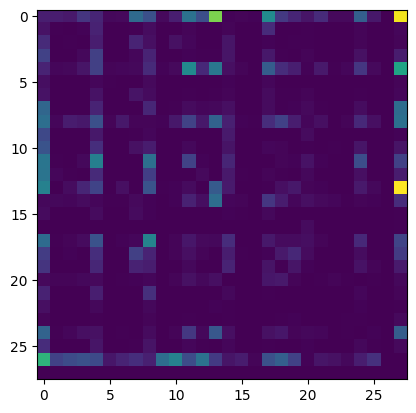

In [31]:
plt.imshow(chars_metrics)

In [15]:
int_to_chars = {i: ch for ch, i in chars_to_int.items()}

In [16]:
# chars_metricsのベクトルの要素のタイプはtensor
# 中身を取り出すにはitem()を使う
type(chars_metrics[1,1])
type(chars_metrics[1,1].item())

int

(-0.5, 27.5, 27.5, -0.5)

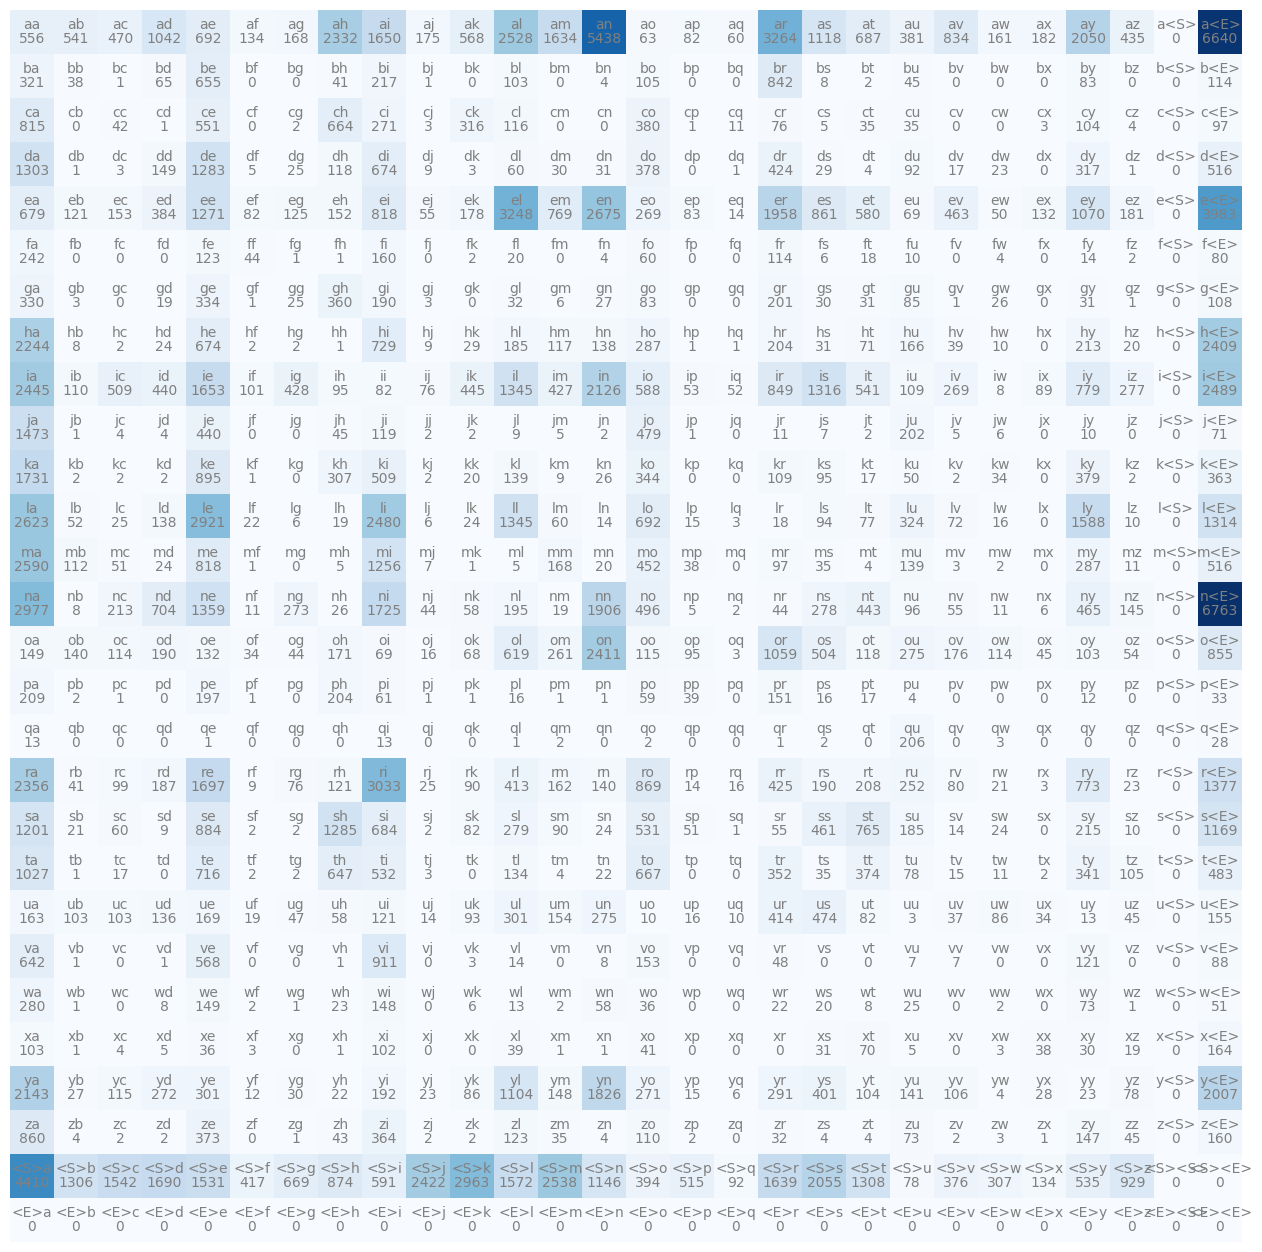

In [17]:
plt.figure(figsize=(16, 16))
plt.imshow(chars_metrics, cmap='Blues')
for i in range(28):
    for j in range(28):
        bigram_repr = int_to_chars[i] + int_to_chars[j]
        plt.text(j, i, bigram_repr, ha='center', va='bottom', color='gray')
        plt.text(j, i, chars_metrics[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')
#　このグラフは、文字列の出現頻度を表している
#　例えば、'a'が'aの後に出現した回数は556回

In [181]:
# <S>, <E>はNLPでよく使われる特殊文字
# 代わりに . を使う
# 例: <S>hello<E> -> .hello.
# .の辞書keyは0番目には配置する
master = torch.zeros((27, 27), dtype=torch.int32)
str_to_int = {ch: i+1 for i, ch in enumerate(all_chars)}
str_to_int['.'] = 0
int_to_str = {i: ch for ch, i in str_to_int.items()}
int_to_str

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [127]:
for w in words:
    special_chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(special_chs, special_chs[1:]):
        ch1_idx = str_to_int[ch1]
        ch2_idx = str_to_int[ch2]
        master[ch1_idx, ch2_idx] += 1

(-0.5, 26.5, 26.5, -0.5)

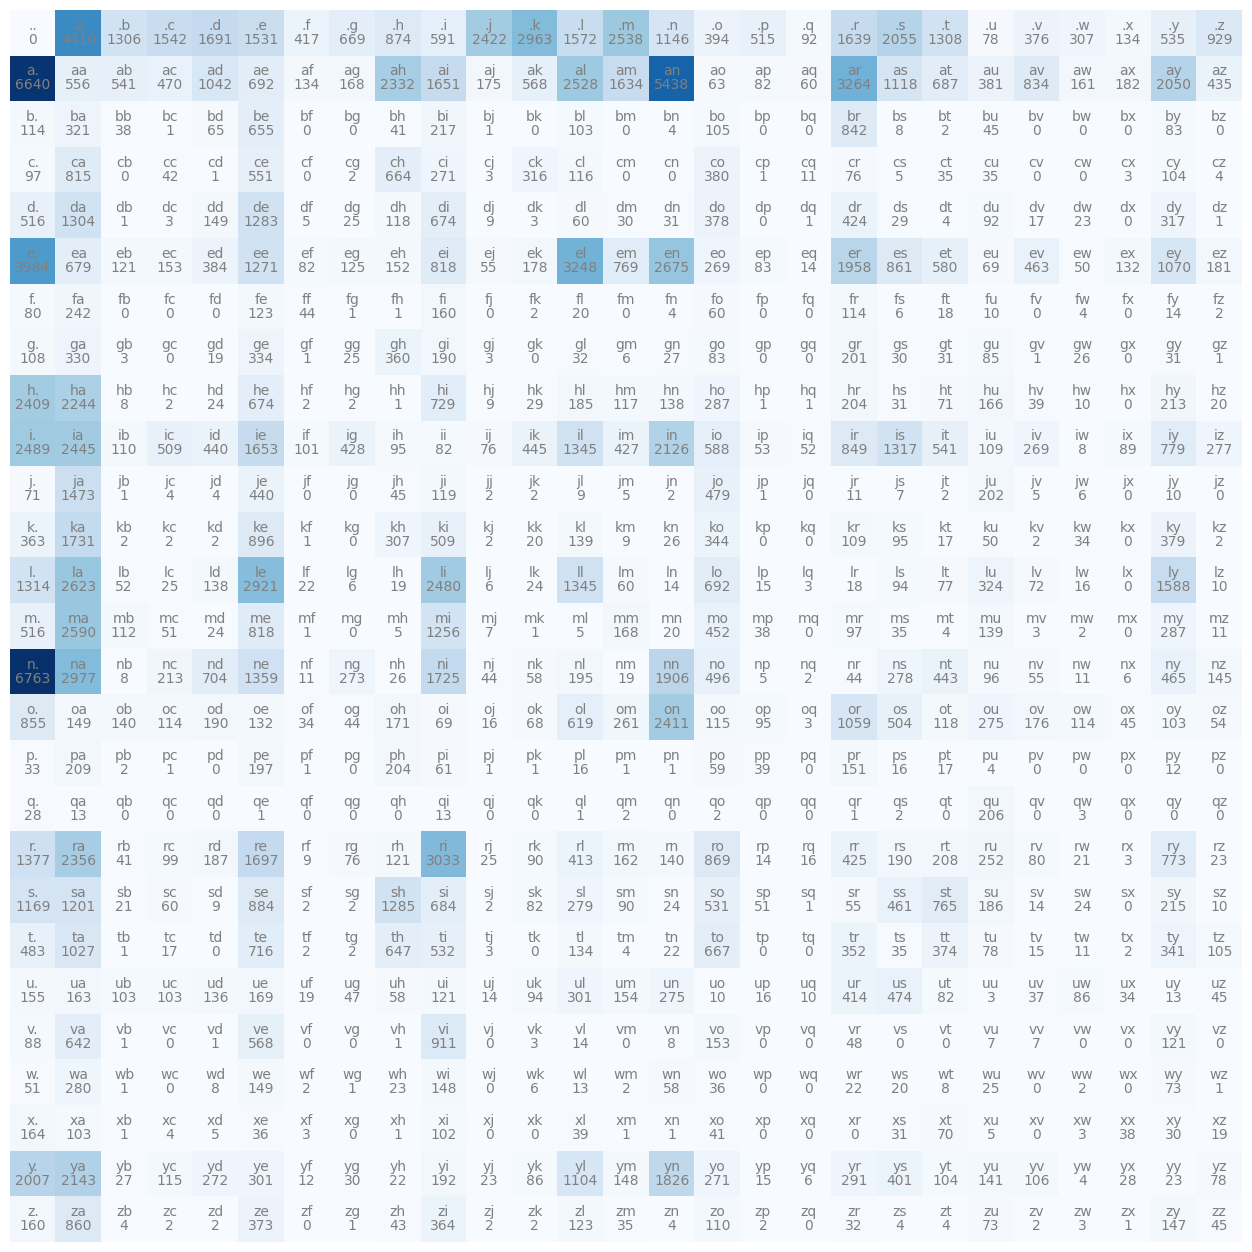

In [114]:
plt.figure(figsize=(16, 16))
plt.imshow(master, cmap='Blues')
for i in range(27):
    for j in range(27):
        bigram_repr = int_to_str[i] + int_to_str[j]
        plt.text(j, i, bigram_repr, ha='center', va='bottom', color='gray')
        plt.text(j, i, master[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [59]:
master.shape


torch.Size([27, 27])

In [112]:
p = (master + 1).float()
p = p / p.sum(1, keepdim=True)

(-0.5, 26.5, 26.5, -0.5)

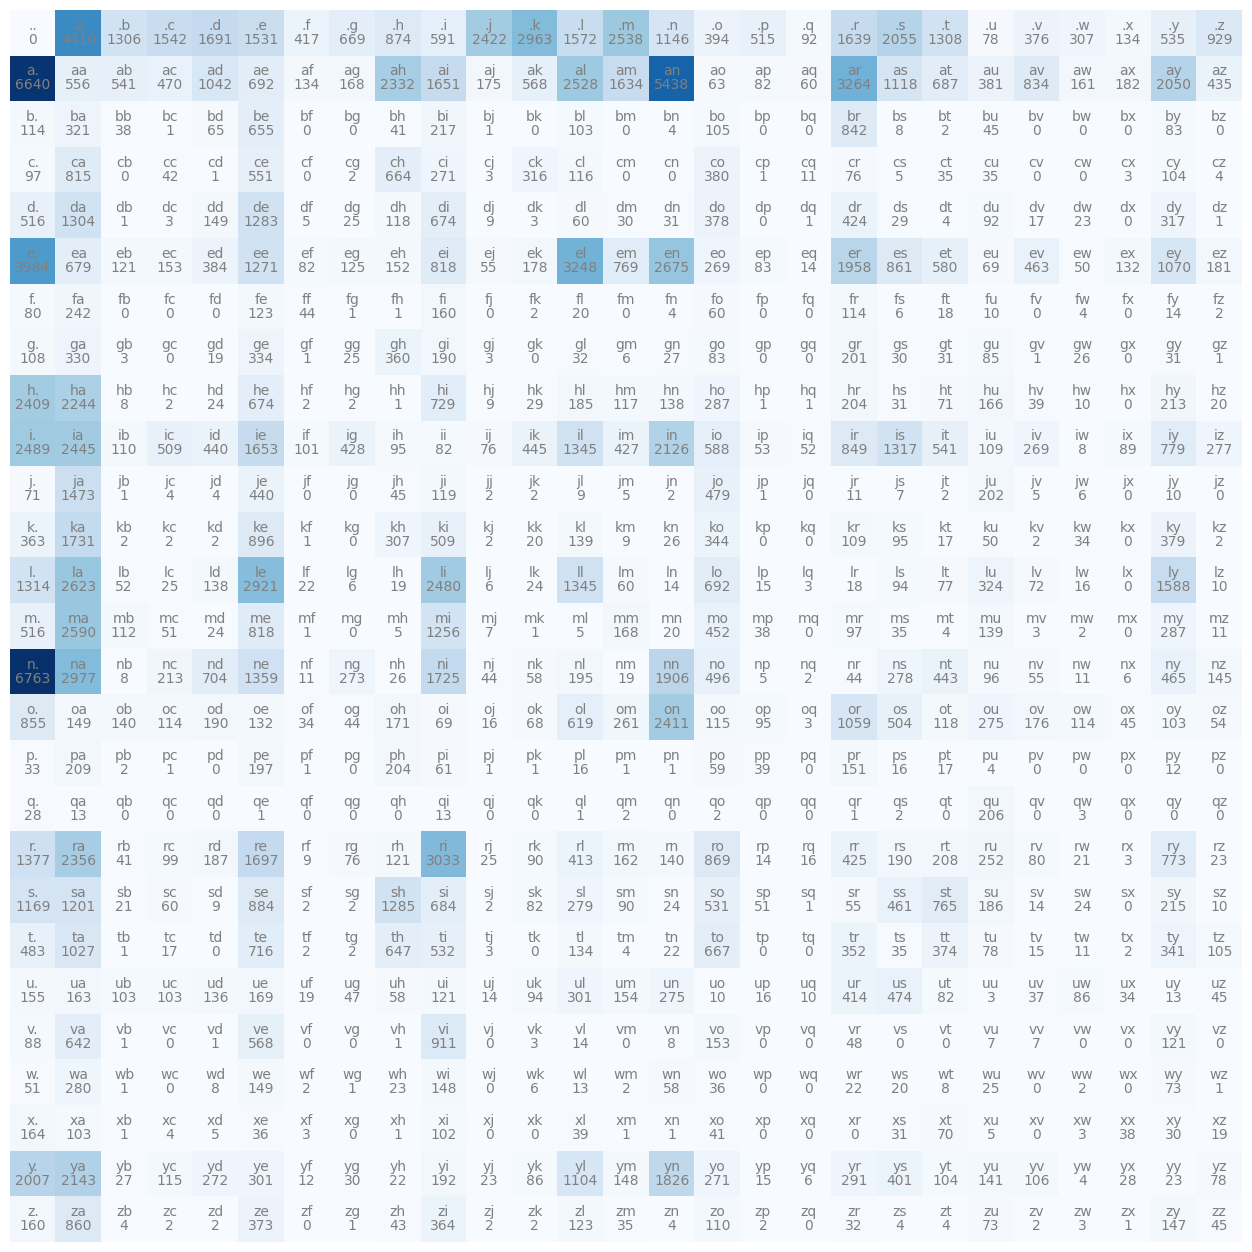

In [115]:
plt.figure(figsize=(16, 16))
plt.imshow(master, cmap='Blues')
for i in range(27):
    for j in range(27):
        bigram_repr = int_to_str[i] + int_to_str[j]
        plt.text(j, i, bigram_repr, ha='center', va='bottom', color='gray')
        plt.text(j, i, master[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')
#　このグラフは、文字列の出現頻度を表している
#　例えば、'a'が'aの後に出現した回数は556回

In [36]:
# 確率分布ベクトルに変換する。まずはfloatにタイプを変換する
p = master[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [24]:
g = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g) # tensor([13])
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
int_to_str[idx]

's'

In [75]:
# 確率を固定するためにgeneratorを使う
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
print(p)
p = p / p.sum()
p

tensor([0.7081, 0.3542, 0.1054])


tensor([0.6064, 0.3033, 0.0903])

In [76]:
# replacement = True で重複を許す。Falseで重複を許さない
# pは確率分布ベクトル
# 1回のサンプリングで1つの文字を選択する
# generatorは乱数のシードを固定する
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [119]:
P = (master+1).float()
P /= P.sum(dim=1, keepdim=True)
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    idx = 0
    out = []
    while True:
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(int_to_str[idx])
        if idx == 0:
            break

    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [120]:
# 評価関数は、すべての確率を掛け合わせたもの
# 例: p1 * p2 * p3 * p4
# 実際はpは小さくなるので、対数を取り、足し合わせる
# 例: log(p1) + log(p2) + log(p3) + log(p4) = log(p1 * p2 * p3 * p4)
# この関数をlog-likelihoodと呼ぶ
# 関数の合計値はマイナスなので、符号を反転してかつ標準化する

# あまりにもサンプルにないデータをいれると、確率が0になるため、すべての文字出現確率に1を足す
# これはスムージングと呼ばれる(smoothing)

In [118]:
log_likelihood = 0.0
n = 0

# for w in words:
for w in ['daisukeqgadlw']:
    special_chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(special_chs, special_chs[1:]):
        ch1_idx = str_to_int[ch1]
        ch2_idx = str_to_int[ch2]
        prob = P[ch1_idx, ch2_idx]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}, {ch2}: {prob:.3f} {logprob:.3f}")

print(f"Log likelihood: {log_likelihood}")
nll = -log_likelihood
print(f"Negative log likelihood: {nll}")
print(f"Perplexity: {nll / n}")

., d: 0.053 -2.942
d, a: 0.236 -1.443
a, i: 0.049 -3.022
i, s: 0.074 -2.599
s, u: 0.023 -3.773
u, k: 0.030 -3.505
k, e: 0.177 -1.732
e, q: 0.001 -7.218
q, g: 0.003 -5.700
g, a: 0.169 -1.776
a, d: 0.031 -3.482
d, l: 0.011 -4.506
l, w: 0.001 -6.713
w, .: 0.054 -2.912
Log likelihood: -51.3206901550293
Negative log likelihood: 51.3206901550293
Perplexity: 3.6657636165618896


In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

: 

In [34]:
import torch

In [32]:
N = torch.zeros((28,28), dtype=torch.int32)

In [66]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [149]:
# create the traning set for all the bigram model (x, y)
xs, ys = [], []

for w in words[:1]:
    special_chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(special_chs, special_chs[1:]):
        ch1_idx = chars_to_int[ch1]
        ch2_idx = chars_to_int[ch2]
        print(f"{ch1}, {ch2}: {ch1_idx}, {ch2_idx}")
        xs.append(ch1_idx)
        ys.append(ch2_idx)
    
xs = torch.tensor(xs, dtype=torch.int64)
ys = torch.tensor(ys, dtype=torch.int64)
# torch.nn.functional.one_hot(my_tensor.long())　でone-hotベクトルに変換できる、torch.int32では  one_hot is only applicable to index tensor.エラー
        

., e: 26, 4
e, m: 4, 12
m, m: 12, 12
m, a: 12, 0
a, .: 0, 26


In [ ]:
# tensor.tensor and tensor.Tensor は別物
# one hot encodingを使う, 1次元のtensorを2次元のtensorに変換する。
# たとえば[1, 2, 3] は、[1, 0, 0], [0, 1, 0], [0, 0, 1]に変換する

In [144]:
xs

tensor([26,  4, 12, 12,  0], dtype=torch.int32)

In [145]:
ys

tensor([ 4, 12, 12,  0, 26], dtype=torch.int32)

In [153]:
import torch.nn.functional as F
x_enc = F.one_hot(xs, num_classes=27).float() # onehotはlong型を返すので、floatに変換する必要あり
x_enc

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [151]:
x_enc.shape

torch.Size([5, 27])

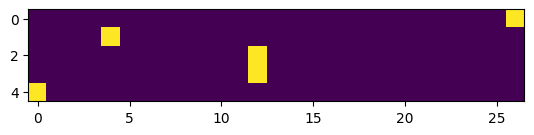

In [152]:
plt.imshow(x_enc) # tensorのshapeが(3, 27)なので、3行27列の画像になる, tensorを可視化する。黄色が1、青が0

In [158]:
x_enc.dtype

torch.float32

In [157]:
x_enc = x_enc.float()

In [161]:
# 5, 27
# 27, 1
W = torch.randn(27, 1)
x_enc @ W # pytorchで@は行列の積のオペレーションをする

tensor([[-0.4322],
        [ 0.0908],
        [-0.7775],
        [-0.7775],
        [-0.6254]])

In [162]:
# 5, 27
# 27, 27 -> 27, 27
W = torch.randn(27, 27)
x_enc @ W # 27, 27

tensor([[ 0.8408, -0.0681, -0.2236, -1.0339,  1.8711,  1.0729, -0.6340, -0.4369,
         -0.2931,  0.2937,  0.4904,  0.0626, -1.5069, -0.4061,  0.9695, -0.0319,
         -0.4005, -0.0955, -0.9461, -1.3305, -1.6336,  0.5557, -0.2054, -0.9745,
         -0.0351,  0.5950,  1.3953],
        [ 0.3480, -1.1565,  1.1180,  1.3396, -0.2746, -1.0359, -0.5586,  0.5022,
          0.4601,  1.1108, -1.3751, -0.9783, -0.7636, -1.0027,  0.2424,  0.1462,
          0.5106,  1.6538, -0.4312,  0.5429,  1.1876, -0.4298,  0.0789,  0.9224,
         -0.8447,  1.5109, -0.0102],
        [ 1.3093, -1.2283,  0.9564,  1.0199, -0.9642,  0.0125, -0.3282, -1.5374,
         -0.5816,  0.8442, -1.3041,  0.6596, -0.8319,  1.2275,  1.0392, -0.4657,
         -0.4611,  0.9877,  2.0124, -0.5916, -0.8521,  1.9545, -1.0802, -0.2529,
         -1.1884,  0.5356, -0.4761],
        [ 1.3093, -1.2283,  0.9564,  1.0199, -0.9642,  0.0125, -0.3282, -1.5374,
         -0.5816,  0.8442, -1.3041,  0.6596, -0.8319,  1.2275,  1.0392, -0.4657

In [164]:
(x_enc @ W)[3,13] # 3行目の13列目の要素を取り出す

tensor(1.2275)

In [166]:
logits = (x_enc @ W) # expは指数関数, すべての要素に対してexpを計算してfloatをカウントとして読み取る, log count -> count
counts = logits.exp() # すべての要素に対してexpを計算してfloatをカウントとして読み取る, log count -> count
probs = counts / counts.sum(dim=1, keepdim=True) # すべての要素を合計して1になるように正規化する
probs

tensor([[0.0636, 0.0256, 0.0219, 0.0098, 0.1782, 0.0802, 0.0145, 0.0177, 0.0205,
         0.0368, 0.0448, 0.0292, 0.0061, 0.0183, 0.0723, 0.0266, 0.0184, 0.0249,
         0.0106, 0.0073, 0.0054, 0.0478, 0.0223, 0.0104, 0.0265, 0.0497, 0.1107],
        [0.0328, 0.0073, 0.0708, 0.0884, 0.0176, 0.0082, 0.0132, 0.0382, 0.0367,
         0.0703, 0.0059, 0.0087, 0.0108, 0.0085, 0.0295, 0.0268, 0.0386, 0.1210,
         0.0150, 0.0398, 0.0759, 0.0151, 0.0250, 0.0582, 0.0099, 0.1049, 0.0229],
        [0.0793, 0.0063, 0.0557, 0.0594, 0.0082, 0.0217, 0.0154, 0.0046, 0.0120,
         0.0498, 0.0058, 0.0414, 0.0093, 0.0731, 0.0606, 0.0134, 0.0135, 0.0575,
         0.1603, 0.0119, 0.0091, 0.1513, 0.0073, 0.0166, 0.0065, 0.0366, 0.0133],
        [0.0793, 0.0063, 0.0557, 0.0594, 0.0082, 0.0217, 0.0154, 0.0046, 0.0120,
         0.0498, 0.0058, 0.0414, 0.0093, 0.0731, 0.0606, 0.0134, 0.0135, 0.0575,
         0.1603, 0.0119, 0.0091, 0.1513, 0.0073, 0.0166, 0.0065, 0.0366, 0.0133],
        [0.0410, 0.0042,

In [172]:
probs[0].shape

torch.Size([27])

In [ ]:
# summary   ----------------    

In [183]:
# randomly generate 
g = torch.Generator().manual_seed(2147483647 + 5)
W = torch.randn((27, 27), generator=g, )

In [184]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
# the last 2 steps can be done by softmax, which takes positive and negative numbers and normalizes them to be between 0 and 1

In [185]:
probs.shape

torch.Size([5, 27])

In [191]:
xs

tensor([26,  4, 12, 12,  0])

In [192]:
ys

tensor([ 4, 12, 12,  0, 26])

In [186]:
nlis = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # input character index
    print("------------------")
    print(f"bigram example{i+1}: {int_to_chars[x]}, {int_to_chars[y]} indexes {x} and {y}")
    print("input to the nural net", x)
    print("output probability of the nural net", probs[i])
    print("label, the actual character", y)
    p = probs[i, y]
    print("probability assigned by the net to the correct character", p.item())
    logp = torch.log(p)
    print("log likelihood of the correct character", logp.item())
    nli = -logp
    print("negative log likelihood of the correct character", nli.item())
    nlis[i] = nli

print("====================================")
print("average negative log likelihood, loss =", nlis.mean().item())

------------------
bigram example1: <S>, e indexes 26 and 4
input to the nural net 26
output probability of the nural net tensor([0.0285, 0.0326, 0.0105, 0.0203, 0.0145, 0.0088, 0.0074, 0.0196, 0.0430,
        0.0045, 0.0093, 0.0168, 0.0178, 0.0601, 0.0140, 0.0119, 0.0131, 0.0288,
        0.0149, 0.0168, 0.0176, 0.0223, 0.0172, 0.0041, 0.0262, 0.0349, 0.4845])
label, the actual character 4
probability assigned by the net to the correct character 0.014460545033216476
log likelihood of the correct character -4.236331462860107
negative log likelihood of the correct character 4.236331462860107
------------------
bigram example2: e, m indexes 4 and 12
input to the nural net 4
output probability of the nural net tensor([0.0321, 0.0287, 0.0124, 0.0170, 0.0144, 0.0342, 0.0330, 0.0119, 0.0694,
        0.1077, 0.0449, 0.0105, 0.0204, 0.0543, 0.0183, 0.0405, 0.0849, 0.0178,
        0.0140, 0.0655, 0.0185, 0.0378, 0.0609, 0.0085, 0.0178, 0.0441, 0.0806])
label, the actual character 12
probability 

In [195]:
probs[torch.arange(5), ys]

tensor([0.0145, 0.0204, 0.0084, 0.0275, 0.0040])

In [197]:
-probs[torch.arange(5), ys].log().mean()

tensor(4.4022)

In [222]:
#forward pass
# randomly generate 
g = torch.Generator().manual_seed(2147483647 + 5)
W = torch.randn((27, 27), generator=g, requires_grad=True) # requires_grad=Trueで勾配を計算する, defaultでfalse

In [ ]:
#optimization part

In [261]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
# the last 2 steps can be done by softmax, which takes positive and negative numbers and normalizes them to be between 0 and 1
loss = -probs[torch.arange(5), ys].log().mean()

In [262]:
#backpropagation
W.grad = None #set to zero the gradient
loss.backward()

In [211]:
print(loss.item())

4.402233123779297


In [203]:
W.grad

tensor([[ 0.0003,  0.0014,  0.0264,  0.0341,  0.0015,  0.0028,  0.0082,  0.0141,
          0.0131,  0.0052,  0.0022,  0.0025,  0.0033,  0.0231,  0.0027,  0.0027,
          0.0231,  0.0019,  0.0039,  0.0054,  0.0031,  0.0027,  0.0032,  0.0042,
          0.0010,  0.0071, -0.1992],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [263]:
W.data += -0.1 * W.grad # update the weights

In [265]:
print(loss.item())

4.380337238311768


In [274]:
# create data set
xs = []
ys = []

nlis = torch.zeros(5)
for w in words:
    # i-th bigram
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(chars_to_int[ch1])
        ys.append(chars_to_int[ch2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples", num)

g = torch.Generator().manual_seed(2147483647 + 5)
W = torch.randn((27, 27), generator=g, requires_grad=True) # requires_grad=Trueで勾配を計算する, defaultでfalse

number of examples 228154


In [277]:
(W ** 2).sum() # regularization

tensor(1531.5403, grad_fn=<SumBackward0>)

In [278]:
(W ** 2).mean()

tensor(2.1009, grad_fn=<MeanBackward0>)

In [286]:
for k in range(100):
    
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    # the last 2 steps can be done by softmax, which takes positive and negative numbers and normalizes them to be between 0 and 1
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W ** 2).mean()
    print(loss.item())

    #backpropagation
    W.grad = None #set to zero the gradient
    loss.backward()

    W.data += -50 * W.grad # update the weights

2.480764389038086
2.480762481689453
2.4807608127593994
2.4807589054107666
2.480757236480713
2.48075532913208
2.4807538986206055
2.4807519912719727
2.480750322341919
2.4807486534118652
2.4807469844818115
2.4807450771331787
2.480743408203125
2.4807422161102295
2.4807398319244385
2.480738401412964
2.48073673248291
2.4807350635528564
2.480733871459961
2.480731964111328
2.4807302951812744
2.4807286262512207
2.480727434158325
2.4807257652282715
2.4807240962982178
2.480722188949585
2.4807205200195312
2.4807193279266357
2.480717897415161
2.4807162284851074
2.480714797973633
2.480713129043579
2.4807114601135254
2.4807097911834717
2.4807088375091553
2.4807074069976807
2.480705738067627
2.4807043075561523
2.4807026386260986
2.480701208114624
2.4807000160217285
2.480698585510254
2.4806971549987793
2.4806957244873047
2.480694055557251
2.4806928634643555
2.480691432952881
2.480689764022827
2.4806885719299316
2.480687379837036
2.4806859493255615
2.480684280395508
2.4806830883026123
2.4806816577911377

In [287]:
# how to sample from the model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:

        # before
        # p = P[ix]
        # forward pass
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        # sample from the model
        ix = torch.multinomial(p, num_samples=1, generator=g).item()
        out.append(int_to_chars[ix])
        if ix == 0:
            break

    print("".join(out))

ValueError: only one element tensors can be converted to Python scalars